In [1]:
import sys

# Move to scripts directory
sys.path.append('../scripts')

from create_cross_sec import create_cross_sec

In [9]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/cross-sec-data/FlatContinuumIsotropic.inc869.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [10]:
print(y_arr)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [504   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [11]:
NSIDE = 32
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 5

# split_data = create_cross_sec(arr, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

0.4805447470817121 1.0
DTYPE:  int64


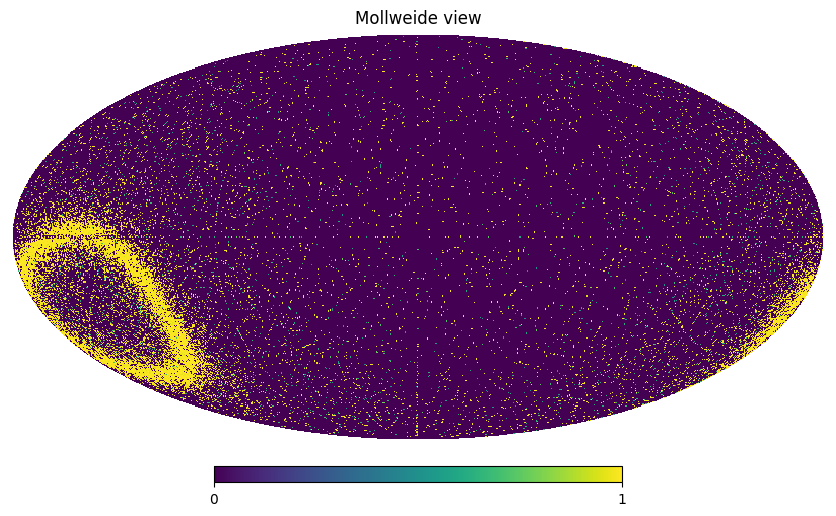

In [16]:

import healpy as hp

sys.path.append("../utils")
from utils import normalize

test_data_y = y_arr[5]

 # Normalize each cross section
range_val = np.max(test_data_y) - np.min(test_data_y)

cross_sec = normalize(test_data_y)


minval = np.min(cross_sec[np.nonzero(cross_sec)])
maxval = np.max(cross_sec[np.nonzero(cross_sec)])

print(minval, maxval)

print("DTYPE: ", test_data_y.dtype)

hp.mollview(cross_sec)

0.4805447470817121 1.0
DTYPE:  float32


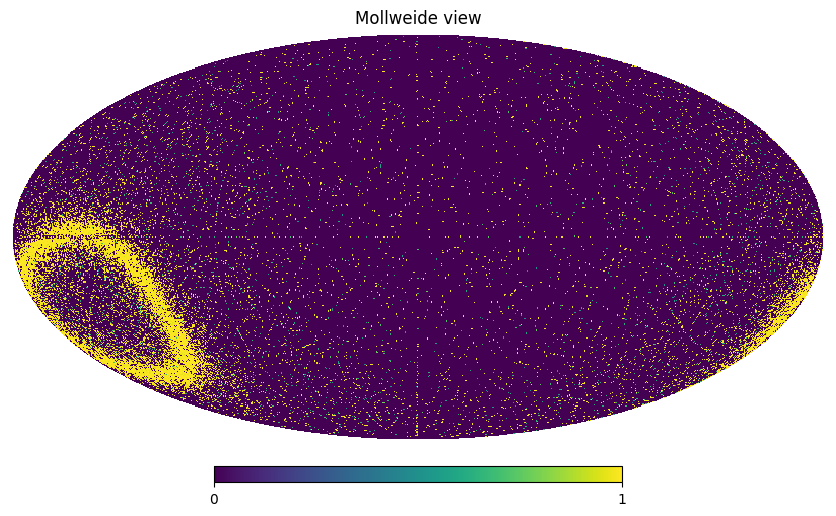

In [17]:

import torch

y_after = torch.tensor(cross_sec).to(dtype=torch.float32, device="cpu")
y_after = y_after.detach().numpy()

minval = np.min(cross_sec[np.nonzero(cross_sec)])
maxval = np.max(cross_sec[np.nonzero(cross_sec)])

print(minval, maxval)

print("DTYPE: ", y_after.dtype)

hp.mollview(y_after)

In [6]:
NSIDE = 1024
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 8


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc515.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

split_data = create_cross_sec(vals, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

KeyboardInterrupt: 

In [1]:
new_test_data = split_data['y'][5]
hp.mollview(new_test_data)

NameError: name 'split_data' is not defined

In [8]:
sys.path.append("../dataset")
print(sys.path)
from dataset.HealpixSimDataset import HealpixSimDataset


['/Users/akotamraju/Documents/dev/URAP/new-responseapprox/src/notebooks', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python37.zip', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/lib-dynload', '', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages/IPython/extensions', '/Users/akotamraju/.ipython', '../scripts', '../dataset']


ModuleNotFoundError: No module named 'dataset'

(array([2.96000e+02, 1.20300e+03, 3.04700e+03, 6.34100e+03, 1.08320e+04,
        1.74100e+04, 1.58080e+04, 3.49600e+03, 4.96000e+02, 5.38557e+05]),
 array([ 74.4506 , 118.58249, 162.71438, 206.84627, 250.97816, 295.11005,
        339.24194, 383.37383, 427.50572, 471.63761, 515.7695 ]),
 <BarContainer object of 10 artists>)

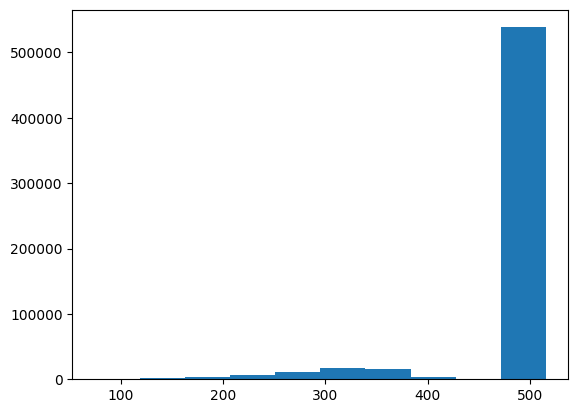

In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc965.id1.tra.gz.pkl", "rb");

vals = pickle.load(f)

f.close()

plt.hist(vals[2])



(array([ 18757.,  62244.,  93456., 105526., 100705.,  96599.,  53445.,
         36117.,  23052.,   7585.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

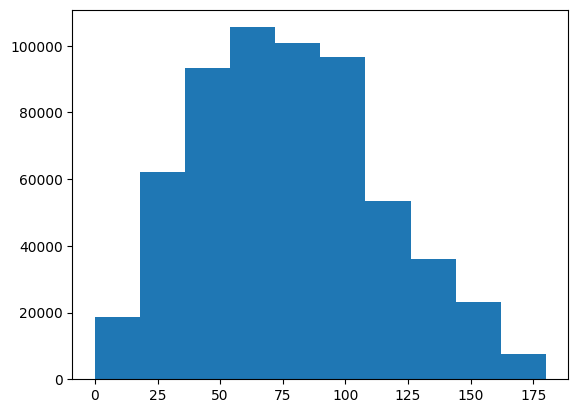

In [10]:
plt.hist(vals[3])

In [11]:
max(vals[4])

179.96627676698233